
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)



# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Deep Learning. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

__*GridSearch:*__ CodeGrade will likely break if it is asked to run a gridsearch for a deep learning model (CodeGrade instances run on a single processor). So while you may choose to run a gridsearch locally to find the optimum hyper-parameter values for your model, please delete (or comment out) the gridsearch code and simply instanitate a model with the optimum parameter values to get the performance that you want out of your model prior to submission. 


## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

____

# (CodeGrade) Before you submit your notebook you must first

1) Restart your notebook's Kernal

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

3) If you have gridsearch code, now is when you either delete it or comment out that code so CodeGrade doesn't run it and crash. 

4) Read the directions in **Part 2** of this notebook for specific instructions on how to prep that section for CodeGrade.

____

<a id="p1"></a>
## Part 1 - LSTMs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Name your model as `model`
- Use a `single hidden layer`
- Use `sparse_categorical_crossentropy` as your loss function
- Use `accuracy` as your metric
- Report your overall score and accuracy
- Due to resource concerns on CodeGrade, `set your model's epochs=1`

For reference, the LSTM code we used in class will be useful. 

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done! 

In [1]:
# Basic Package Imports
import re
import numpy as np
import pandas as pd
import random
import sys
import os

# Keras Imports for LSTM Models
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional
from tensorflow.keras.layers import LSTM

In [2]:
# Import data (don't alter the code in this cell)
from tensorflow.keras.datasets import reuters

# Suppress some warnings from deprecated reuters.load_data
import warnings
warnings.filterwarnings('ignore')

# Load data
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

# Due to limited computational resources on CodeGrade, take the following subsample 
train_size = 1000
X_train = X_train[:train_size]
y_train = y_train[:train_size]

In [3]:
y_test[:5]

array([18,  3,  3,  9, 19])

In [4]:
# Demo of encoding
word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [5]:
# Keras docs say that the + 1 is needed: https://keras.io/api/layers/core_layers/embedding/
# (REMINDER TO FUTURE SELF: These are calculated based on the vocabulary of our dataset)
MAX_FEATURES = len(word_index.values()) + 1

# maxlen is the length of each sequence (i.e. document length)
MAXLEN = 200

In [6]:
# Pre-process your data by creating sequences 
# Save your transformed data to the same variable name:
# example: X_train = some_transformation(X_train)


# Breaking up dataset into sequences of the same length
# REMINDER: By defauls, .pad_sequences will trim front part of data vectors leaving only ending ones
X_train = sequence.pad_sequences(X_train, maxlen=MAXLEN)
X_test = sequence.pad_sequences(X_test, maxlen=MAXLEN)

In [7]:
# Verifying shape makes sense based on maxlen value
# Note: To avoid computational overload, the training data was limited to using only 1000 records
        # This is why our test data has more records than the training data!
        # Outside of an assessment environment, I would have removed the limit on training data

print(X_train.shape)
print(X_test.shape)

(1000, 200)
(2246, 200)


In [8]:
# Visible tests
assert X_train.shape[1] == MAXLEN, "Your train input sequences are the wrong length. Did you use the sequence import?"
assert X_test.shape[1] == MAXLEN, "Your test input sequences are the wrong length. Did you use the sequence import?"

### Create your model

Make sure to follow these instructions (also listed above):
- Name your model as `model`
- Use a `single hidden layer`
- Use `sparse_categorical_crossentropy` as your loss function
- Use `accuracy` as your metric

**Additional considerations**

The number of nodes in your output layer should be equal to the number of **unique** values in the sequences you are training and testing on. For this text, that value is equal to 46.

- Set the number of nodes in your output layer equal to 46

In [9]:
# Build and compile your model here

model = Sequential()

# Input/Output Settings
# Defined here for clarity of code
embed_input_dim = MAX_FEATURES
embed_output_dim = 46

# Embedding layer
model.add(Embedding(embed_input_dim, embed_output_dim))

# Single Hidden LSTM Later
# Return_sequenc false since only using 1 hidden LSTM layers 
model.add(LSTM(46, return_sequences=False))

# Output Later
model.add(Dense(embed_output_dim, activation="softmax"))

# define optimizer

# Compile Model
model.compile(loss = 'sparse_categorical_crossentropy',
              # tested a few other optimizers. SGD Performed the best
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 46)          1425080   
_________________________________________________________________
lstm (LSTM)                  (None, 46)                17112     
_________________________________________________________________
dense (Dense)                (None, 46)                2162      
Total params: 1,444,354
Trainable params: 1,444,354
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Visible Test
assert model.get_config()["layers"][1]["class_name"] == "Embedding", "Layer 1 should be an Embedding layer."

In [12]:
# Hidden Test

### Fit your model

Now, fit the model that you built and compiled in the previous cells. Remember to set your `epochs=1`! 

In [13]:
# Fit your model here
# REMEMBER to set epochs=1

In [14]:
# Fit Model
model.fit(X_train, y_train,
                batch_size=32,
                epochs=1, 
                  validation_data=(X_test,y_test))

32/32 [==============================] - 6s 133ms/step - loss: 3.8032 - accuracy: 0.2465 - val_loss: 3.7167 - val_accuracy: 0.3664


In [15]:
# Visible Test 
n_epochs = len(model.history.history["loss"])
assert n_epochs == 1, "Verify that you set epochs to 1."

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

The "pad_sequences" method trims down all of the vectors to the same length. By default, it trims the first part of the vector and leaves the end. This allows for greater accuracy.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

One of the big problems with RNN networks is the possibility for gradient vanishing meaning that as gradient descent takes place, the weights slowly become smaller and smaller with each iteration. Long-Short Term Memory Cells prevent this from happening by holding "memories" of past iterations through the network. LSTM cells have forget gates that help control what information is dropped and what is retained.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

- If you were trying to make a model that would analyze text and predict who said it, lSTM would be a good choice
- If you were creating a time-series model to predict data at future events, lstm would be a good choice
- LSTM models are also great analyzing text and creating new text

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it.

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2, and you should also resize the images using scikit-image.

### Reading in the images

The code in the following cell will download the images to your notebook (either in your local Jupyter notebook or in Google colab).

In [ ]:
## NOTE: I couldn't get scikit-image to work correctly
# Alex gave me the okay to encode the images in my own way

In [9]:
import requests

image_urls = url_list

for _id,img in enumerate(image_urls): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

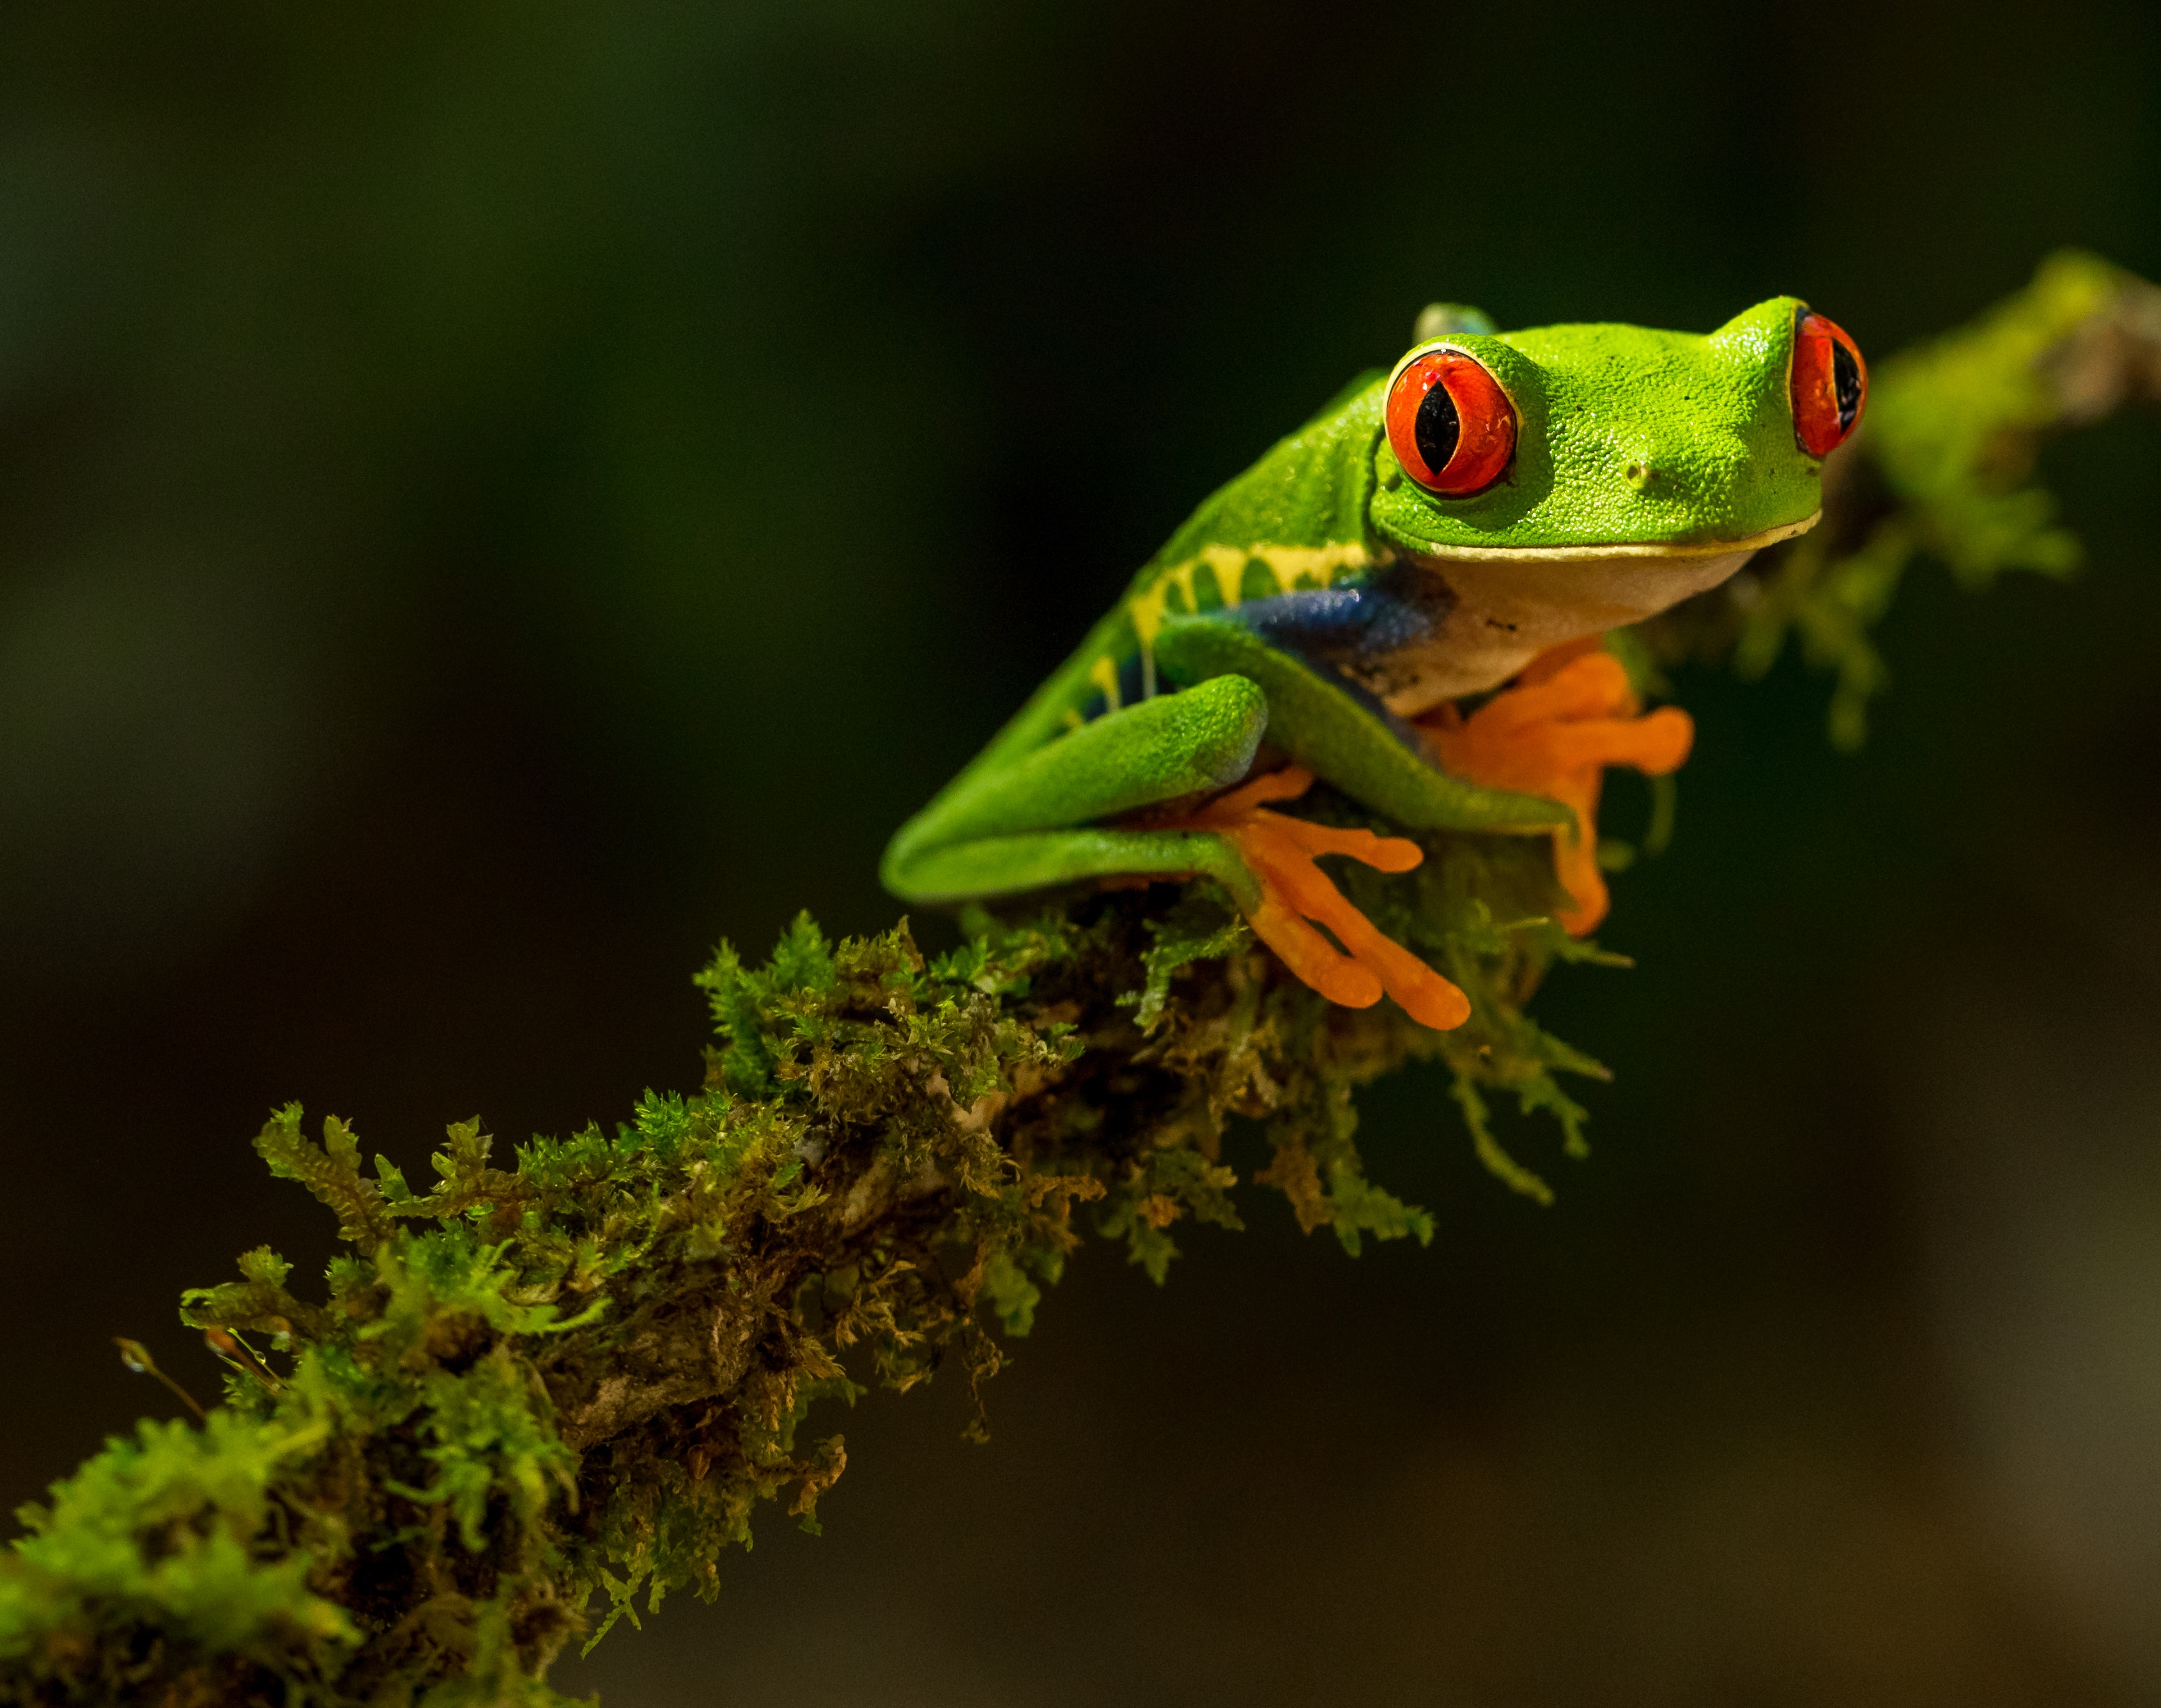

In [37]:
from IPython.display import Image
Image(filename='./example14.jpg', width=600)

In [18]:
# Prep to import images (don't alter the code in this cell)
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.image as image

# Text file of image URLs
text_file = "https://raw.githubusercontent.com/LambdaSchool/data-science-canvas-images/main/unit_4/sprint_challenge_files/frog_image_url.txt"
data = urllib.request.urlopen(text_file)

# Create list of image URLs
url_list = [] 
for line in data:
    url_list.append(line.decode('utf-8'))
    
# Edit image urls
url_list = [url.replace('\n', '') for url in url_list]

In [5]:
url_list

['https://raw.githubusercontent.com/LambdaSchool/data-science-canvas-images/main/unit_4/sprint_challenge_files/frog_images/cristiane-teston-bcnfJvEYm1Y-unsplash.jpg',
 'https://raw.githubusercontent.com/LambdaSchool/data-science-canvas-images/main/unit_4/sprint_challenge_files/frog_images/drew-brown-VBvoy5gofWg-unsplash.jpg',
 'https://raw.githubusercontent.com/LambdaSchool/data-science-canvas-images/main/unit_4/sprint_challenge_files/frog_images/ed-van-duijn-S1zA6AR50X8-unsplash.jpg',
 'https://raw.githubusercontent.com/LambdaSchool/data-science-canvas-images/main/unit_4/sprint_challenge_files/frog_images/elizabeth-explores-JZybccsrB-0-unsplash.jpg',
 'https://raw.githubusercontent.com/LambdaSchool/data-science-canvas-images/main/unit_4/sprint_challenge_files/frog_images/jacky-watt-92W5jPbOj48-unsplash.jpg',
 'https://raw.githubusercontent.com/LambdaSchool/data-science-canvas-images/main/unit_4/sprint_challenge_files/frog_images/jared-evans-VgRnolD7OIw-unsplash.jpg ',
 'https://raw.gi

In [29]:
image_list = []

for url in url_list:
    my_img = plt.imread(url, format='jpeg')
    image_list.append(my_img)

In [58]:
image_list

[array([[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 2,  2,  2],
         [ 2,  2,  2],
         [ 2,  2,  2]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 2,  2,  2],
         [ 2,  2,  2],
         [ 2,  2,  2]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 2,  2,  2],
         [ 2,  2,  2],
         [ 2,  2,  2]],
 
        ...,
 
        [[15, 16, 11],
         [14, 15, 10],
         [14, 15, 10],
         ...,
         [29, 29, 17],
         [28, 28, 16],
         [28, 28, 16]],
 
        [[14, 15, 10],
         [14, 15, 10],
         [14, 15, 10],
         ...,
         [29, 29, 17],
         [28, 28, 16],
         [28, 28, 16]],
 
        [[13, 14,  9],
         [13, 14,  9],
         [12, 13,  8],
         ...,
         [30, 30, 18],
         [30, 30, 18],
         [29, 29, 17]]], dtype=uint8),
 array([[[246, 244, 247],
         [246, 2

In [57]:
import cv2
image_list_2 = []

for image in images:
    img = cv2.imread(image)
    res = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
    image_list_2.append(res)

error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-39p1qqfs/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [60]:
# Import images (don't alter the code in this cell)

from skimage.io import imread
# from skimage.transform import resize 

# # instantiate list to hold images
# image_list = []

### UNCOMMENT THE FOLLOWING CODE TO LOAD YOUR IMAGES

#loop through URLs and load each image
# for url in url_list:
#    image_list.append(imread(url))

## UNCOMMENT THE FOLLOWING CODE TO VIEW AN EXAMPLE IMAGE SIZE
#What is an "image"?
print(type(image_list[0]), end="\n\n")

print("Each of the Images is a Different Size")
print(image_list[0].shape)
print(image_list[1].shape)

ImportError: dlopen(/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-3-Deep-Learning-A-62w8AT/lib/python3.8/site-packages/skimage/_shared/geometry.cpython-38-darwin.so, 2): Symbol not found: ____chkstk_darwin
  Referenced from: /Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-3-Deep-Learning-A-62w8AT/lib/python3.8/site-packages/skimage/_shared/../.dylibs/libomp.dylib (which was built for Mac OS X 10.15)
  Expected in: /usr/lib/libSystem.B.dylib
 in /Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-3-Deep-Learning-A-62w8AT/lib/python3.8/site-packages/skimage/_shared/../.dylibs/libomp.dylib
It seems that scikit-image has not been built correctly.

Your install of scikit-image appears to be broken.
Try re-installing the package following the instructions at:
https://scikit-image.org/docs/stable/install.html 

### Run ResNet50v2

Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. You can print out or view the predictions in any way you see fit. In order to receive credit, you need to have made predictions at some point in the following cells.

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

**Autograded tasks**

* Instantiate your ResNet 50v2 and save to a variable named `resnet_model`

**Other tasks**
* Re-size your images
* Use `resnet_model` to predict if each image contains a frog
* Decode your predictions
* Hint: the lesson on CNNs will have some helpful code

**Stretch goals***
* Check for other things such as fish
* Print out the image with its predicted label
* Wrap everything nicely in well documented functions

## Important note!

To increase the chances that your notebook will run in CodeGrade, when you **submit** your notebook:

* comment out the code where you load the images
* comment out the code where you make the predictions
* comment out any plots or image displays you create

**MAKE SURE YOUR NOTEBOOK RUNS COMPLETELY BEFORE YOU SUBMIT!**

Autograded tasks

- Instantiate your ResNet 50v2 and save to a variable named resnet_model

Other tasks

- Re-size your images
- Use resnet_model to predict if each image contains a frog
- Decode your predictions - Hint: the lesson on CNNs will have some helpful code


In [50]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications.resnet_v2 import ResNet50V2 # <-- pre-trained model 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions

In [52]:
# Instantiate Pre-Trained Model
resnet_model = ResNet50V2()

for layer in resnet_model.layers:
    layer.trainable = False
    
def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

In [53]:
resnet_model.input, resnet_model.output

(<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>)

In [54]:
def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

In [55]:
def img_with_frog(img):
  model = ResNet50V2()
  features = model.predict(img)
  results = decode_predictions(features, top=3)[0]
  print(results)
  for entry in results:
    if entry[1] == 'mountain':
      return entry[2]
  return 0.0

In [56]:
img_with_frog(res0)

ValueError: in user code:

    /Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-3-Deep-Learning-A-62w8AT/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-3-Deep-Learning-A-62w8AT/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-3-Deep-Learning-A-62w8AT/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-3-Deep-Learning-A-62w8AT/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-3-Deep-Learning-A-62w8AT/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-3-Deep-Learning-A-62w8AT/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-3-Deep-Learning-A-62w8AT/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-3-Deep-Learning-A-62w8AT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-3-Deep-Learning-A-62w8AT/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer resnet50v2: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [19]:
# Visible test
assert resnet_model.get_config()["name"] == "resnet50v2", "Did you instantiate the resnet model?"

<a id="p3"></a>
## Part 3 - Autoencoders

**Describe a use case for an autoencoder given that an autoencoder tries to predict its own input.**

Autoencoders work to compress down inputs and then give an output based on the condensed inputs. This is useful for finding outliers in data since the models accuracy depends on the autoencoder correctly identifying the outliers in each data item.

<a id="p4"></a>
## Part 4 - More...

**Answer the following questions, with a target audience of a fellow Data Scientist:**

- What do you consider your strongest area as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?

A few sentences per answer is fine - only elaborate if time allows.

YOUR ANSWER HERE

## Congratulations! 

Thank you for your hard work, and [congratulations](https://giphy.com/embed/26xivLqkv86uJzqWk)!!! You've learned a lot, and you should proudly call yourself a Data Scientist.
